## DBSCAN Project  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action = "ignore", category = FutureWarning)


## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [3]:
df = pd.read_csv("../DATA/wholesome_customers_data.csv")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Visualizations

<Axes: xlabel='Milk', ylabel='Grocery'>

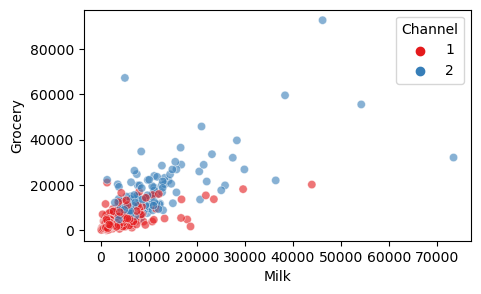

In [6]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = df, x = "Milk", y = "Grocery", hue = "Channel", alpha = 0.6, palette = "Set1")

<Axes: xlabel='Milk', ylabel='Count'>

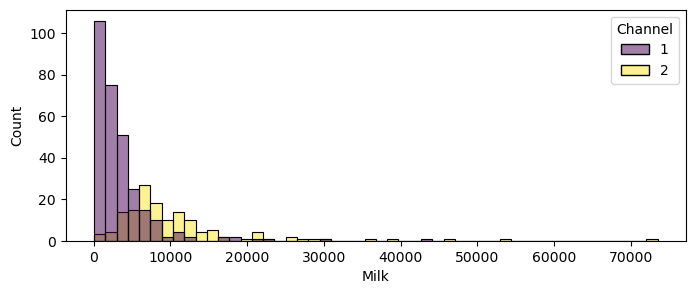

In [7]:
plt.figure(figsize = (8, 3))
sns.histplot(data = df, x = "Milk", hue = "Channel", palette = "viridis")

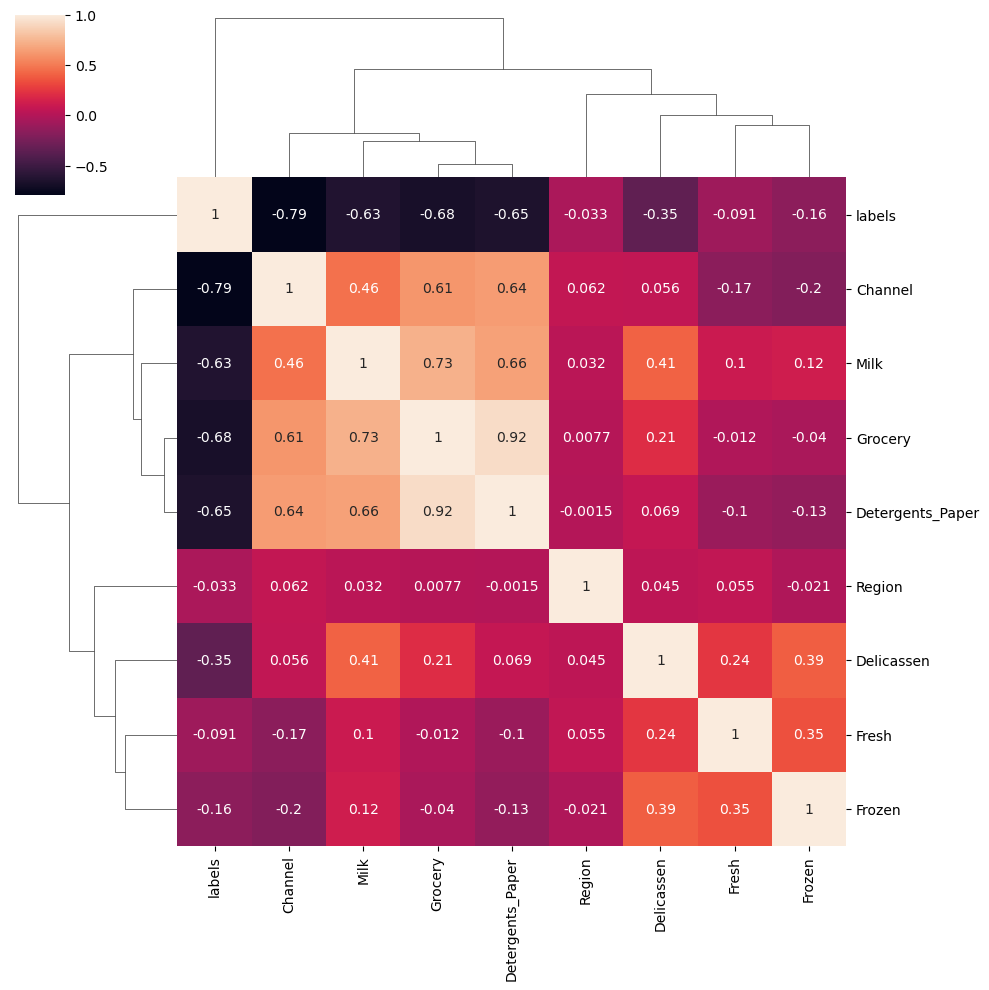

In [31]:
sns.clustermap(data = df.corr(), annot=True)

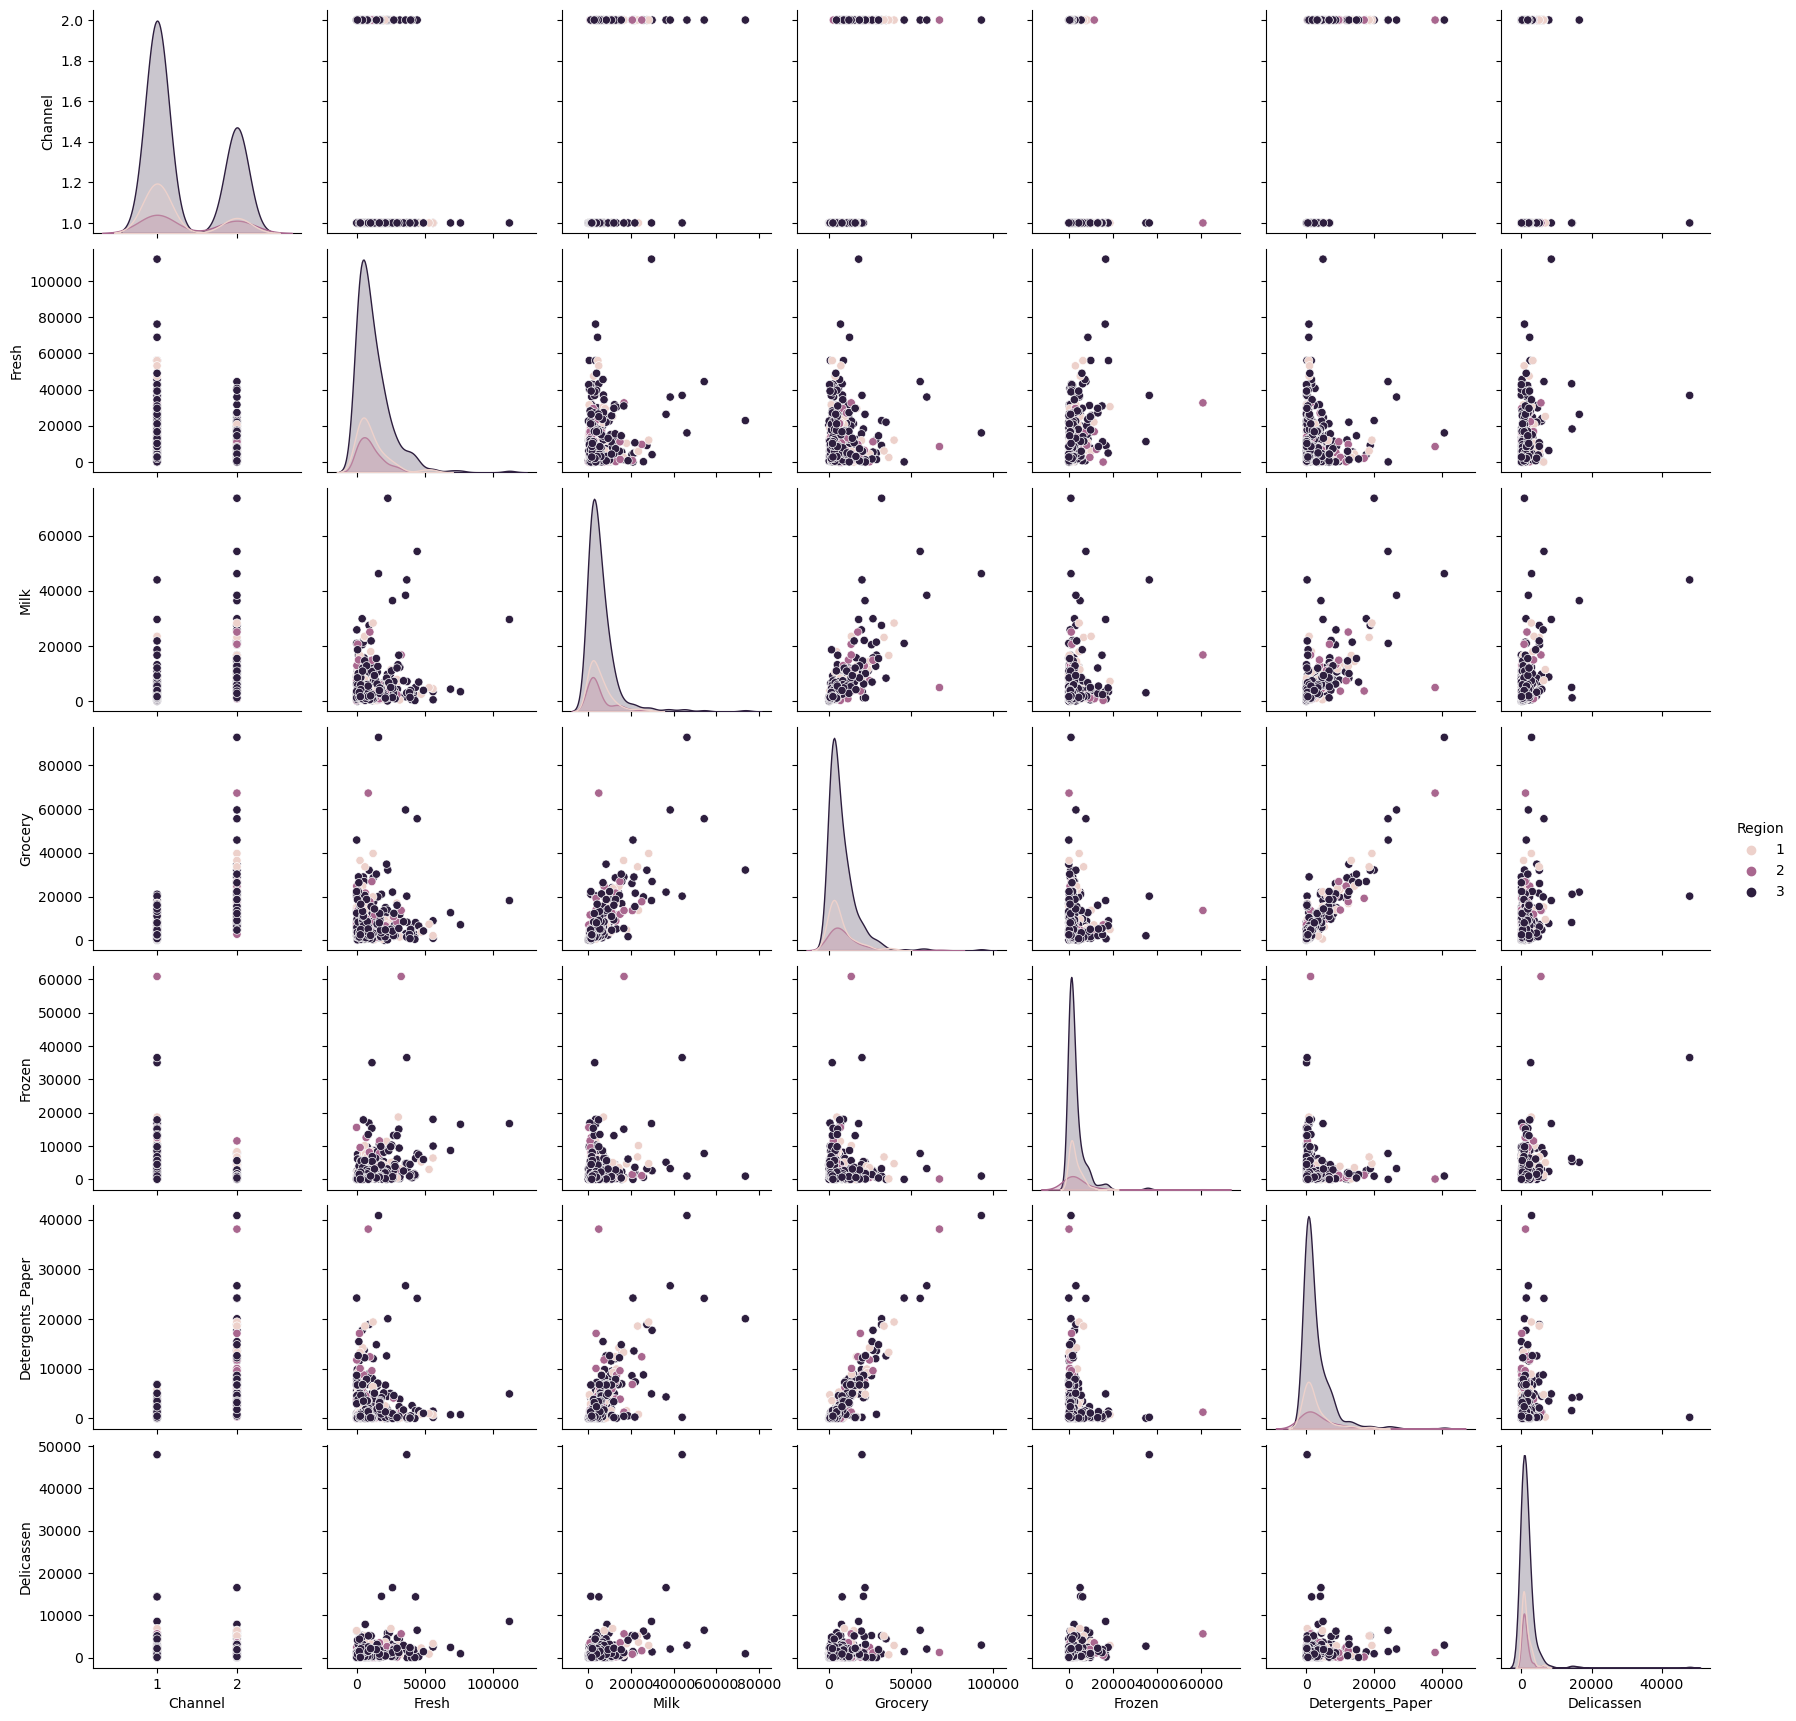

In [9]:
sns.pairplot(data = df, hue = "Region")

### Scikit learn Imports

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

#### Data Preprocessing

In [11]:
scaler = StandardScaler()

In [12]:
X = scaler.fit_transform(df)

Eps optimization

In [13]:
percent_outliers = []
range = np.linspace(0.001,3,50)
for eps in range:
    model = DBSCAN(eps = eps, min_samples = 2*df.shape[1])
    model.fit(X)

    percent_outliers.append(100 * np.sum(model.labels_ == -1) / len(model.labels_))

<Axes: >

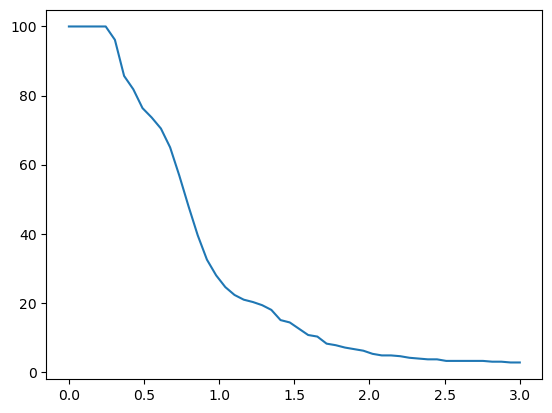

In [14]:
sns.lineplot(x= range, y = percent_outliers)

2 or 2.5 seems to be a reasonable choice for epsilon

In [15]:
model = DBSCAN(min_samples = 2*df.shape[1], eps = 2)

In [16]:
labels = model.fit_predict(X)

<Axes: xlabel='Milk', ylabel='Grocery'>

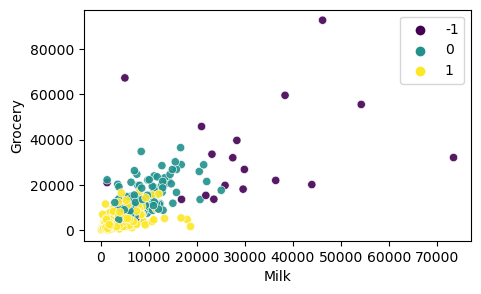

In [17]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = df, x = "Milk", y = "Grocery", hue = labels, alpha = 0.9, palette = "viridis")

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

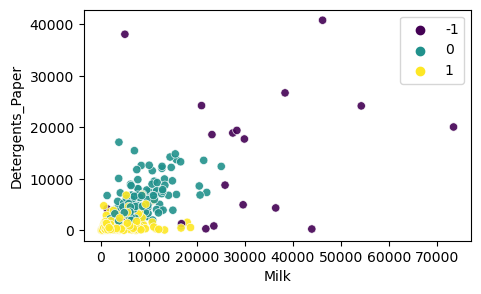

In [18]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = df, x = "Milk", y = "Detergents_Paper", hue = labels, alpha = 0.9, palette = "viridis")

In [19]:
df_ = df

In [20]:
df["labels"]  = labels

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [22]:
means = df.groupby("labels").mean()[["Fresh","Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]
df.groupby("labels").mean()[["Fresh","Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


In [23]:
mmscaler = MinMaxScaler()

In [24]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [26]:
scaled_df = mmscaler.fit_transform(means)

In [27]:
scaled_df = pd.DataFrame(scaled_df, columns = means.columns, index = means.index)

In [28]:
scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<Axes: ylabel='labels'>

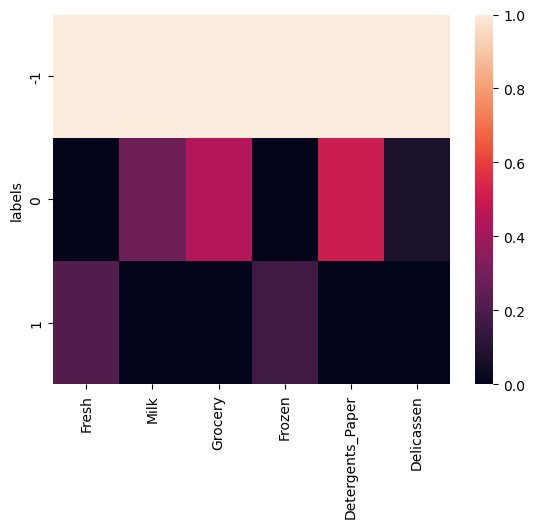

In [29]:
sns.heatmap(data = scaled_df)

<Axes: ylabel='labels'>

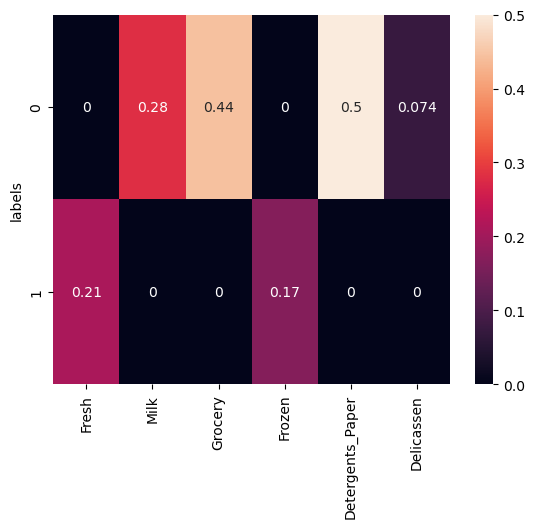

In [30]:
sns.heatmap(data = scaled_df.drop(-1), annot = True)

From this heatmap it can concluded that Detergent paper is the most significant feature for the clustering